# **Big Mart Sales Prediction**


In [460]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [461]:
from google.colab import files
uploaded=files.upload()

Saving train_v9rqX0R.csv to train_v9rqX0R (7).csv


In [462]:
from google.colab import files
uploaded=files.upload()

Saving test_AbJTz2l.csv to test_AbJTz2l (6).csv


In [463]:
# Reading dataset
df_train = pd.read_csv('train_v9rqX0R.csv')
df_test = pd.read_csv('test_AbJTz2l.csv')

In [464]:
df_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [465]:
df_test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [466]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [467]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [468]:
df_test10=df_test.copy()

In [469]:
df_test10

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [470]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [471]:
#checking unique values
df_train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [472]:
#dataset shape
df_train.shape

(8523, 12)

In [473]:
#checking datatypes
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [474]:
#checking null values
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [475]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [476]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [477]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [478]:
#checking unique values
df_test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [479]:
#dataset shape
df_test.shape

(5681, 11)

In [480]:
#checking datatypes
df_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [481]:
#checking null values
df_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [482]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [483]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


**Exploratory Data Analysis on Train dataset**

In [484]:
#plotting correlation
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [485]:
#plotting correlation
df_test.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.019089,0.049809,0.018918
Item_Visibility,-0.019089,1.000000,-0.014013,-0.097040
Item_MRP,0.049809,-0.014013,1.000000,-0.007233
Outlet_Establishment_Year,0.018918,-0.097040,-0.007233,1.000000


<Figure size 1440x1080 with 0 Axes>

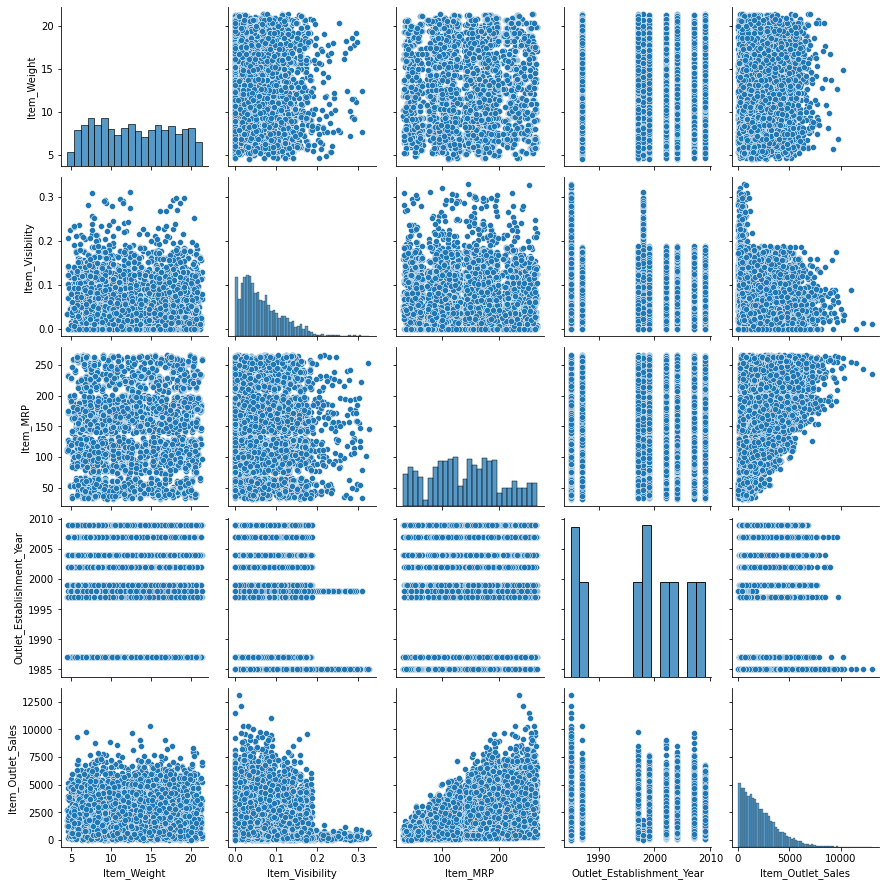

In [486]:
plt.figure(figsize=(20,15))
sns.pairplot(df_train)

<Figure size 1440x1080 with 0 Axes>

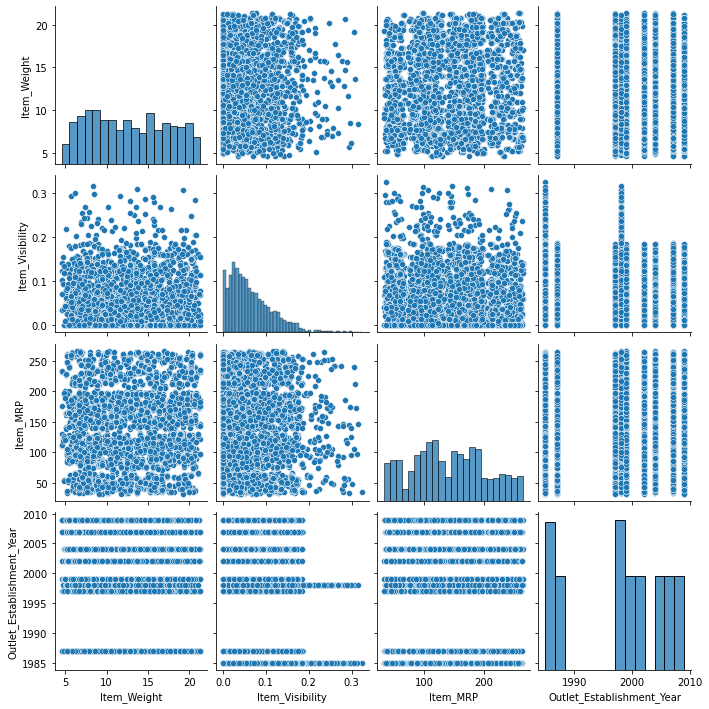

In [487]:
plt.figure(figsize=(20,15))
sns.pairplot(df_test)

In [488]:
#no of unique items
df_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [489]:
#no of unique items
df_test['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

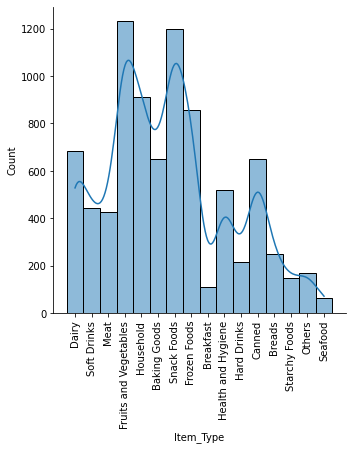

In [490]:
#sns.displot of train data, item type

#sns.xticks(rotation=90)
g=sns.displot(data=df_train, x='Item_Type',kde = True) #kde == to get kernel density graph
g.set_xticklabels (rotation=90)
plt.show()

The categories Fruits and Vegetables --   1232 and Snack Foods  --1200 have good number of count

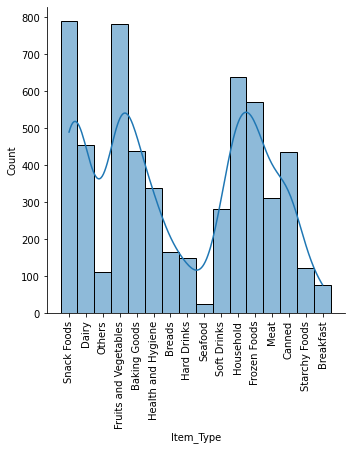

In [491]:
#sns.displot of test data, item type

#sns.xticks(rotation=90)
g=sns.displot(data=df_test, x='Item_Type',kde = True) #kde == to get kernel density graph
g.set_xticklabels (rotation=90)
plt.show()

The categoiesy  Snack Foods  --789 and Fruits and Vegetables --   781  have good number of count

In [492]:
#no of unique items
df_train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

<Axes: >

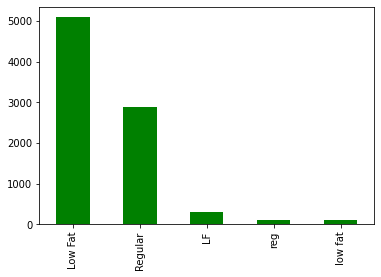

In [493]:
df_train.Item_Fat_Content.value_counts().plot(kind='bar',color='g')

<Axes: >

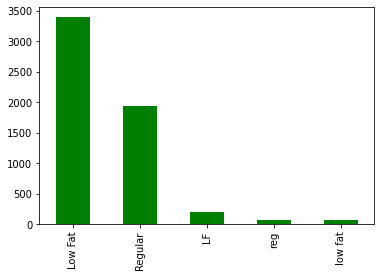

In [494]:
df_test.Item_Fat_Content.value_counts().plot(kind='bar',color='g')

<Axes: >

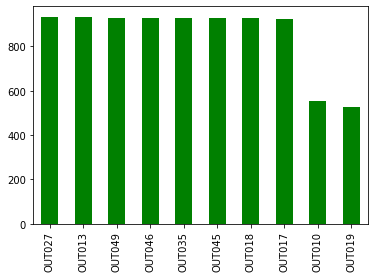

In [495]:
df_train.Outlet_Identifier.value_counts().plot(kind='bar',color='g')

<Axes: >

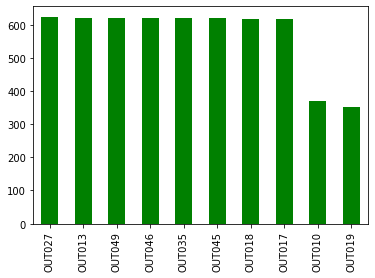

In [496]:
df_test.Outlet_Identifier.value_counts().plot(kind='bar',color='g')

<Axes: >

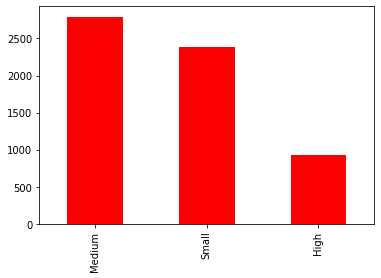

In [497]:
df_train.Outlet_Size.value_counts().plot(kind='bar',color='red')

<Axes: >

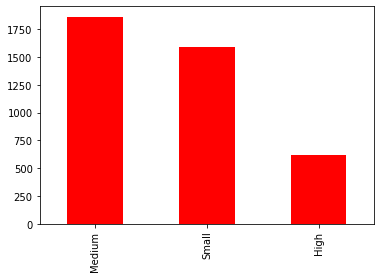

In [498]:
df_test.Outlet_Size.value_counts().plot(kind='bar',color='red')

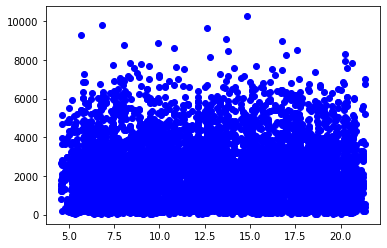

In [499]:
#Item wt vs Sales
plt.scatter(df_train.Item_Weight,df_train.Item_Outlet_Sales,color='blue')

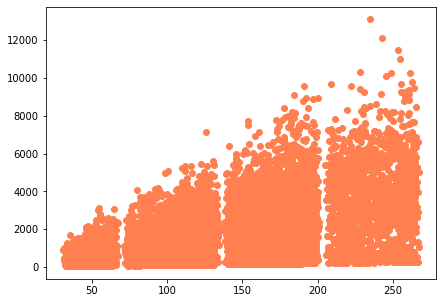

In [500]:
plt.figure(figsize=[7,5]) 
plt.scatter(df_train.Item_MRP,df_train.Item_Outlet_Sales,color='coral')

<Axes: >

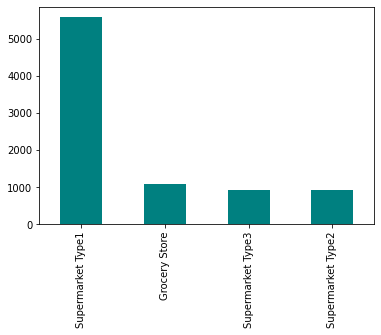

In [501]:
df_train.Outlet_Type.value_counts().plot(kind='bar',color='teal')

<Axes: >

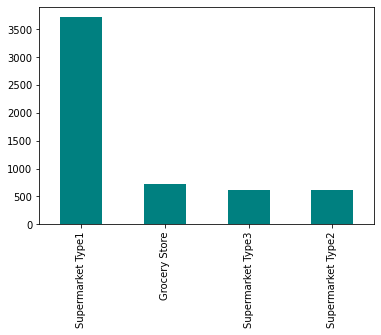

In [502]:
df_test.Outlet_Type.value_counts().plot(kind='bar',color='teal')

**Data Preprocessing**

In [503]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [504]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

null values are seen in Item_Weight and Outlet_Size fields. This needs to be handled


In [505]:
df_train['Item_Weight']=df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())
df_test['Item_Weight']=df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean())


In [506]:
df_train['Outlet_Size']=df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode().iloc[0])
df_test['Outlet_Size']=df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode().iloc[0])

In [507]:
df_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [508]:
df_test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [509]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**Label encoding for categorical fields**

In [510]:
#Label encoding for the field "target" 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_train['Item_Identifier']= label_encoder.fit_transform(df_train['Item_Identifier'])
df_test['Item_Identifier']= label_encoder.fit_transform(df_test['Item_Identifier'])
df_train['Item_Fat_Content']= label_encoder.fit_transform(df_train['Item_Fat_Content'])
df_test['Item_Fat_Content']= label_encoder.fit_transform(df_test['Item_Fat_Content'])
df_train['Item_Type']= label_encoder.fit_transform(df_train['Item_Type'])
df_test['Item_Type']= label_encoder.fit_transform(df_test['Item_Type'])
df_train['Outlet_Identifier']= label_encoder.fit_transform(df_train['Outlet_Identifier'])
df_test['Outlet_Identifier']= label_encoder.fit_transform(df_test['Outlet_Identifier'])
df_train['Outlet_Size']= label_encoder.fit_transform(df_train['Outlet_Size'])
df_test['Outlet_Size']= label_encoder.fit_transform(df_test['Outlet_Size'])
df_train['Outlet_Location_Type']= label_encoder.fit_transform(df_train['Outlet_Location_Type'])
df_test['Outlet_Location_Type']= label_encoder.fit_transform(df_test['Outlet_Location_Type'])
df_train['Outlet_Type']= label_encoder.fit_transform(df_train['Outlet_Type'])
df_test['Outlet_Type']= label_encoder.fit_transform(df_test['Outlet_Type'])


In [511]:
df_test10

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [512]:
df_train.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [513]:
df_test.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
dtype: object

In [514]:
y=df_train['Item_Outlet_Sales']
X=df_train.drop(['Item_Outlet_Sales'],axis=1)
X.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220
std,449.222377,4.226124,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,783.000000,12.857645,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000


In [515]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [516]:
#Min Max scaler
scaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)
test=scaler.fit_transform(df_test)
X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10
0,0.100128,0.282525,0.25,0.048866,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333
1,0.005135,0.081274,0.50,0.058705,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667
2,0.424904,0.770765,0.25,0.051037,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333
3,0.719512,0.871986,0.50,0.000000,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000
4,0.832478,0.260494,0.25,0.000000,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
8518,0.237484,0.137541,0.25,0.172914,0.866667,0.777729,0.111111,0.083333,0.0,1.0,0.333333
8519,0.575738,0.227746,0.50,0.143069,0.000000,0.326263,0.777778,0.708333,0.5,0.5,0.333333
8520,0.870988,0.359929,0.25,0.107148,0.533333,0.228492,0.666667,0.791667,1.0,0.5,0.333333
8521,0.437099,0.158083,0.50,0.442219,0.866667,0.304939,0.333333,1.000000,0.5,1.0,0.666667


In [517]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.500459,0.494352,0.342338,0.201382,0.481779,0.465635,0.524698,0.534661,0.585416,0.556436,0.400407
std,0.288333,0.251630,0.161202,0.157123,0.280666,0.264327,0.315245,0.348823,0.300164,0.406379,0.265486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253851,0.283120,0.250000,0.082187,0.266667,0.265437,0.222222,0.083333,0.500000,0.000000,0.333333
50%,0.502567,0.494352,0.250000,0.164228,0.400000,0.474209,0.555556,0.583333,0.500000,0.500000,0.333333
75%,0.749037,0.681453,0.500000,0.288026,0.666667,0.655156,0.777778,0.791667,1.000000,1.000000,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [518]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=44)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (7670, 11)
X_test shape is  (853, 11)
y_train shape is  (7670,)
y_test shape is  (853,)


In [519]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error

In [520]:
#Random Forest Regressor
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=7, random_state=33)
RandomForestRegressorModel.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, random_state=33)

In [521]:
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))


Random Forest Regressor Train Score is :  0.6399297273859759
Random Forest Regressor Test Score is :  0.6052869246888122


In [522]:
y_pred = RandomForestRegressorModel.predict(X_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

Predicted Value for Random Forest Regressor is :  [1349.78482263  820.53793489 1355.55802706 1309.04631822 1225.39769648
 2458.22447548 1680.93328154 2043.48185525 1669.00845969  212.50361496]


In [523]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') 
print('Mean Squared Error Value is : ', MSEValue)
#Calculating Median Absolute Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Absolute Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  736.6063391040747
Mean Squared Error Value is :  1051402.112738131
Median Absolute Error Value is :  506.66612141313453


In [524]:
test

array([[0.7153048 , 0.96427508, 0.25      , ..., 0.5       , 0.        ,
        0.33333333],
       [0.6919585 , 0.22298303, 1.        , ..., 0.5       , 0.5       ,
        0.33333333],
       [0.91180285, 0.59809467, 0.25      , ..., 0.5       , 1.        ,
        0.        ],
       ...,
       [0.9156939 , 0.32420363, 0.25      , ..., 0.5       , 0.5       ,
        0.33333333],
       [0.33527886, 0.63977374, 0.5       , ..., 0.5       , 0.5       ,
        0.33333333],
       [0.64007782, 0.29443287, 0.5       , ..., 0.5       , 0.5       ,
        0.33333333]])

In [525]:
y_test = RandomForestRegressorModel.predict(test)
y_test

array([1672.30448236, 1338.72020081,  643.22295729, ..., 1912.21854681,
       3764.00527011, 1289.33881309])

In [526]:
#y_test

In [527]:
#df = pd.DataFrame(test)

In [528]:
#df

In [529]:
#df_test

In [530]:
y_test=pd.DataFrame(y_test,columns=['Item_Outlet_Sales'])
#df3=pd.concat(df_test['Item_Identifier'],df_test['Outlet_Identifier'],y_test)
y_test.to_csv('prediction_random_forest2.csv')
y_test

,Item_Outlet_Sales
0,1672.304482
1,1338.720201
2,643.222957
3,2429.418807
4,6233.438808
...,...
5676,2126.283953
5677,2703.663742
5678,1912.218547
5679,3764.005270


In [543]:
from google.colab import files
uploaded=files.upload()

Saving sample_submission_8RXa3c6.csv to sample_submission_8RXa3c6.csv


In [545]:
df13 = pd.read_csv('sample_submission_8RXa3c6.csv')
df13

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [547]:
df14=df13.drop(['Item_Outlet_Sales'],axis=1)
df14

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
...,...,...
5676,FDB58,OUT046
5677,FDD47,OUT018
5678,NCO17,OUT045
5679,FDJ26,OUT017


In [548]:
df4 = y_test['Item_Outlet_Sales']
df4

0       1672.304482
1       1338.720201
2        643.222957
3       2429.418807
4       6233.438808
           ...     
5676    2126.283953
5677    2703.663742
5678    1912.218547
5679    3764.005270
5680    1289.338813
Name: Item_Outlet_Sales, Length: 5681, dtype: float64

In [549]:
df14

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
...,...,...
5676,FDB58,OUT046
5677,FDD47,OUT018
5678,NCO17,OUT045
5679,FDJ26,OUT017


In [550]:
df15 = df14.join(df4)

In [551]:
df15

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1672.304482
1,FDW14,OUT017,1338.720201
2,NCN55,OUT010,643.222957
3,FDQ58,OUT017,2429.418807
4,FDY38,OUT027,6233.438808
...,...,...,...
5676,FDB58,OUT046,2126.283953
5677,FDD47,OUT018,2703.663742
5678,NCO17,OUT045,1912.218547
5679,FDJ26,OUT017,3764.005270


In [538]:
#df_test12=df_test11[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

In [552]:
df15.to_csv('predictionoutput_random_forestdf15.csv')

In [553]:
from google.colab import files
files.download('predictionoutput_random_forestdf15.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>